In [ ]:
import data_prep
import pandas as pd
import numpy as np

# Get the preprocessed dataset
df = data_prep.get_cleaned_dataset()

print(df.dtypes)

In [ ]:
#####################
### FUNCTION DEFS ###
#####################

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

def prep_dataset(df, test_size=0.2):
    # Separate labels & classes
    X = df.drop('Class', axis=1).values     # Labels
    y = df['Class'].values                  # Classes

    X = OneHotEncoder().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

from sklearn.metrics import confusion_matrix # TODO confusion matrix

def basic_predict(X_train, X_test, y_train, y_test, classifier):
    """
    Runs basic prediction with 
    :returns double indicating performance
    NOTE: Random train/test split means performance is not consistent
    """
    classifier.fit(X_train, y_train)

    y_test_predict = classifier.predict(X_test)

    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")

    result = np.array([y_test_predict[ii] == y_test[ii] for ii in range(len(y_test))])

    performance = np.count_nonzero(result)/len(result)

    return performance

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Dataset
df = data_prep.get_cleaned_dataset()

X_train, X_test, y_train, y_test = prep_dataset(df, test_size=0.9966)

# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn_perf = basic_predict(X_train, X_test, y_train, y_test, knn)

# Decision Tree 
# TODO use something other than decision tree
dt = DecisionTreeClassifier()
dt_perf = basic_predict(X_train, X_test, y_train, y_test, dt)

# Naive Bayes
gnb = GaussianNB()
gnb_perf = basic_predict(X_train, X_test, y_train, y_test, dt)

print(f"knn performance: {knn_perf}")
print(f"dt performance: {dt_perf}")
print(f"gnb performance: {gnb_perf}")


In [ ]:
###########
### OLD ###
###########

# Try some knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_test_ratio = 0.8

performance_arr = []

for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=1)

    last_train_row = int(len(df) * train_test_ratio)

    X = df.drop('Class', axis=1).values     # Labels
    y = df['Class'].values                  # Classes

    X = OneHotEncoder().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    knn.fit(X_train, y_train)

    y_predict = knn.predict(X_test)

    result = np.array([y_predict[ii] == y_test[ii] for ii in range(len(y_test))])

    performance = np.count_nonzero(result)/len(result)

    performance_arr.append(performance)

best_n = performance_arr.index(max(performance_arr))
print(best_n)

print(performance_arr[best_n])

In [18]:
#########################################
## Pipeline 1: K-Fold Cross-Validation ##
#########################################
## Missing: hparams, attribute selection, meta-classifiers ##

import pickle

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import data_prep

# Get dataset (mix of categorical & numeric)
df_train, df_test = data_prep.get_prepped_dataset(bins=10, verbose=False)

full = df_train.to_numpy()

# Define values & labels
X = df_train.drop('Class', axis=1).to_numpy()
y = df_train['Class'].to_numpy()

# Perform one-hot encoding on categorical values
X = OneHotEncoder().fit_transform(X)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

knn = KNeighborsClassifier(n_neighbors=3)

result = cross_val_score(knn, X, y, cv=5)


[0.70555556 0.72222222 0.70555556 0.68333333 0.72777778]


In [ ]:
#############################################################
## Pipeline 2: K-Fold Cross-Validation & Feature Selection ##
#############################################################
## Missing: hparams, attribute selection, meta-classifiers ##

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20) TODO do this later!!!

import pickle

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

import data_prep

# Get dataset (mix of categorical & numeric)
df_train, df_test = data_prep.get_prepped_dataset(bins=10, verbose=False)

full = df_train.to_numpy()

# Define values & labels
X = df_train.drop('Class', axis=1).to_numpy()
y = df_train['Class'].to_numpy()

knn = KNeighborsClassifier(n_neighbors=3)

# Build pipeline
pl = Pipeline([
    ('onehot', OneHotEncoder()),
    ('sfs', SequentialFeatureSelector(knn, direction='backward', n_features_to_select=None, cv=5)) # TODO change these params
])

print("Starting pipeline fit...")
pl.fit(X, y)

# Try removing all 2 pairs of features to see what gets the best performance
print("Done!")
with open('pipeline_2', 'wb') as f:
    pickle.dump(pl, f)

In [ ]:
###############
## NEW THING ##
###############



In [34]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import pickle

# messing about with the created object
df_train, df_test = data_prep.get_prepped_dataset(bins=10, verbose=False)

with open('./pipeline_2', 'rb') as f:
    result:Pipeline = pickle.load(f)

sfs:SequentialFeatureSelector = result.named_steps['sfs']
print(sfs.get_support().shape)

# test = df_train.to_numpy()
# X = df_train.drop('Class', axis=1).to_numpy()
# y = df_train['Class'].to_numpy()

# score = accuracy_score(result.predict(X), y)
# print(score)

(118,)


SCORES
{'fit_time': array([0.00421262, 0.00373125, 0.0040772 , 0.00385523, 0.0037756 ]), 'score_time': array([0.01237154, 0.01197577, 0.01241517, 0.01207209, 0.01232457]), 'test_accuracy': array([0.7       , 0.72777778, 0.72222222, 0.67222222, 0.77222222]), 'test_balanced_accuracy': array([0.53454167, 0.52935606, 0.51893939, 0.50661376, 0.61198208]), 'test_f1': array([0.20588235, 0.16949153, 0.13793103, 0.14492754, 0.3880597 ]), 'test_precision': array([0.46666667, 0.45454545, 0.4       , 0.33333333, 0.65      ]), 'test_recall': array([0.13207547, 0.10416667, 0.08333333, 0.09259259, 0.27659574])}
CONFUSION MATRIX
[[0.94307692 0.05692308]
 [0.864      0.136     ]]


<AxesSubplot:>

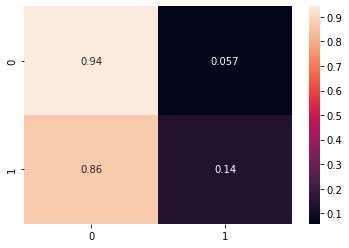

In [17]:
####################################################################
## Pipeline 3: K-Fold Cross-Validation & SMOTE ##
####################################################################
## Missing: hparams, attribute selection, meta-classifiers ##

import pickle

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.pipeline import Pipeline as imbpipeline

import data_prep


# Get dataset (mix of categorical & numeric)
df_train, df_test = data_prep.get_prepped_dataset(bins=10, verbose=False)

full = df_train.to_numpy()

# Define values & labels
X = df_train.drop('Class', axis=1).to_numpy()
y = df_train['Class'].to_numpy()

# Label-encode the labels  
y = LabelEncoder().fit_transform(y)

# Build imblearn pipeline with nominal SMOTE
# ipl = make_pipeline(
#     SMOTEN(random_state=123, sampling_strategy='not minority'),
#     OneHotEncoder()
# )

# X_r, y_r = ipl.fit_resample(X, y)

# for col in df_train.drop('Class', axis=1).columns:
#     print(list(df_train[col].cat.categories))

# Get list of categories per column
categories = [list(df_train[col].cat.categories) for col in df_train.drop('Class', axis=1).columns]

classifier = KNeighborsClassifier(n_neighbors=4)

pl = imbpipeline(steps= [
        # ('smoten', SMOTEN(random_state=123, sampling_strategy='not majority')),
        ('onehot', OneHotEncoder(categories=categories)),
        ('classifier', classifier)
    ]
)

pl.fit(X, y)

# K-Fold Cross validation generator
# NOTE: Stratified K-Fold used to ensure training classes are balanced (gives better representation of SMOTE-enabled prediction)
# kfold = StratifiedKFold(n_splits=5)

kfold = KFold(n_splits=5)

scores = cross_validate(pl, X, y, cv=kfold, scoring=('accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'))
print("SCORES")
print(scores)

preds = cross_val_predict(pl, X, y, cv=kfold)

conf_mat = confusion_matrix(y_pred=preds, y_true=y, normalize='all')
print("CONFUSION MATRIX")
print(conf_mat)

sns.heatmap(conf_mat, annot=True)

# THIS WORKY ######################################################
# print(f"Pre-SMOTE shape: {X.shape}")

# smoten = SMOTEN(random_state=123, sampling_strategy='not majority')
# X_r, y_r = smoten.fit_resample(X, y)

# print(f"Post-SMOTE shape: {X_r.shape}")

# oh_enc = OneHotEncoder()
# X_r = oh_enc.fit_transform(X_r)

# print(f"Post-Onehot shape: {X_r.shape}")

# l_enc = LabelEncoder()
# y_r = l_enc.fit_transform(y_r)
# /THIS WORKY #####################################################

# print(X_r)
# np.savetxt('./x.txt', X_r, fmt='%s')

# print("Done!")
# with open('pipeline_2', 'wb') as f:
#     pickle.dump(sfs, f)

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

arr = np.array(['A', 'B', 'C', 'A', 'C'])

arr = arr.reshape(-1, 1)

arr_oh = OneHotEncoder().fit_transform(arr)

print(arr_oh)
print(type(arr_oh))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'>
